## Homework 3

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [1]:
%pylab inline
data_dir = "../../Data/Weather/"

Populating the interactive namespace from numpy and matplotlib


### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [3]:
!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 77.9M  100 77.9M    0     0  14.1M      0  0:00:05  0:00:05 --:--:-- 17.4M


### Get the statistics from the Pickle File

In [2]:
import pickle
STAT,STAT_description=pickle.load(open(data_dir+'/STAT.pickle','r'))

In [3]:
STAT.keys()

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [4]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [6]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas '../Data/Weather/ghcnd-readme.txt'
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

           TMIN = Minimum temperature (tenths of degrees C)
mean:44.531018 std:109.933072 low1000:-350.000000 low100:-245.000000 high100:239.000000 high1000:278.000000
 	   TOBS = Temperature at the time of observation (tenths of degrees C)
mean:113.582223 std:119.255224 low1000:-267.000000 low100:-167.000000 high100:339.000000 high1000:389.000000
           TMAX = Maximum temperature (tenths of degrees C)
mean:175.823101 std:123.742076 low1000:-233.000000 low100:-122.000000 high100:383.000000 high1000:433.000000
   	   SNOW = Snowfall (mm)
mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:76.000000 high1000:254.000000
	   SNWD = Snow depth (mm)
mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:508.000000 high1000:1676.000000
           PRCP = Precipitation (tenths of mm)
mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:356.000000 high1000:830.000000


### Script for plotting yearly plots 

In [9]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7), c=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if c is not None:
        plot_date(yearday,T, '-',color=c);
    else:
        plot_date(yearday,T, '-', );
    plt.gca().xaxis.set_major_formatter( DateFormatter('%b') )
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low100 and high100 (By which we mean that any value larger or equal to low100 and smaller or equal to high100 is included).
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

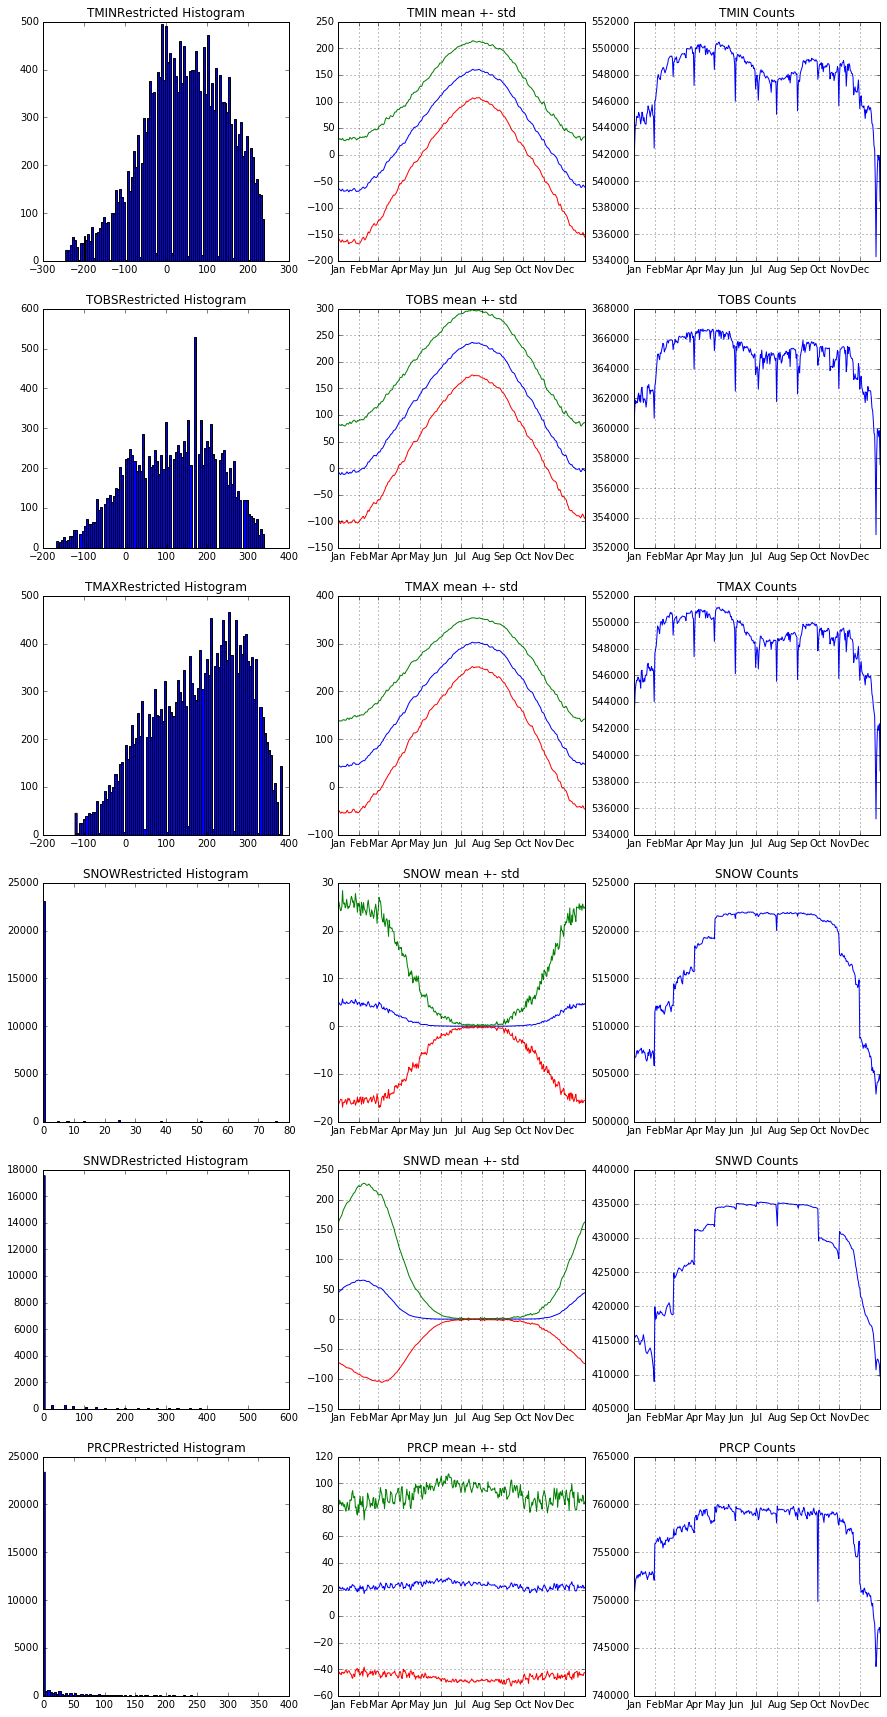

In [10]:
import numpy

figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    list = filter(lambda x:x>=STAT[meas]['low100'] and x<=STAT[meas]['high100'],STAT[meas]['SortedVals'])
    hist(list, bins=100,color='blue')
    title(meas+"Restricted Histogram")
    subplot(6,3,offset)
    offset+=1
    YearlyPlots(STAT[meas]['Mean'],meas+' mean +- std')
    YearlyPlots(STAT[meas]['Mean']+numpy.sqrt(STAT[meas]['Var']),meas+' mean +- std')
    YearlyPlots(STAT[meas]['Mean']-numpy.sqrt(STAT[meas]['Var']),meas+' mean +- std')
    ## Your code for mean and mean +- std
    subplot(6,3,offset)
    offset+=1
    YearlyPlots(STAT[meas]['NE'],meas+' Counts')
    ## Your code for number of measurements

### Plot the Number of measurements recorded each day for TMAX

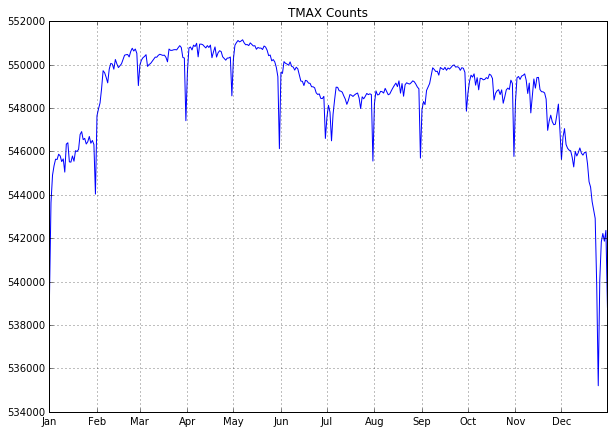

In [11]:
## Your code here
YearlyPlots(STAT['TMAX']['NE'],'TMAX Counts')

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


* The reason for the lower counts for TMAX is holiday season mainly, as can be seen from graph below, which basically plots the count from december1 to Jan 15 the major drop in counts is near christmas and new year.
The overall average of counts of measurement per station throughout the year is 27.5204792356. However this average gets down to 27.3 per station when considering december and half of the jan and the major drop is on december 24 and jan 31 where it drops to ~ 26.8. According to my analysis there are around 24% and 95% stations whose daily count average has dropped on december 24 and jan 31 period respectively. And none of them seems to have more prominent issue than others.

* So, this is not restricted to some particular set of stations. So there is nothing we can do here to remove this effect. Most of the stations are closed on these holidays and at end of the month, leading to the drop in their daily measurements. May be there are some manual issues that are resolved by humans which are not done on these days and thats why the counts are low. Another reason can be that monitoring of data starts late or ends early on these days.


Number of overall stations are  19937
Number of stations whose average dropped on Dec 24 near christmas are  4618
Number of stations whose average dropped on Dec 31 near new year are  18420


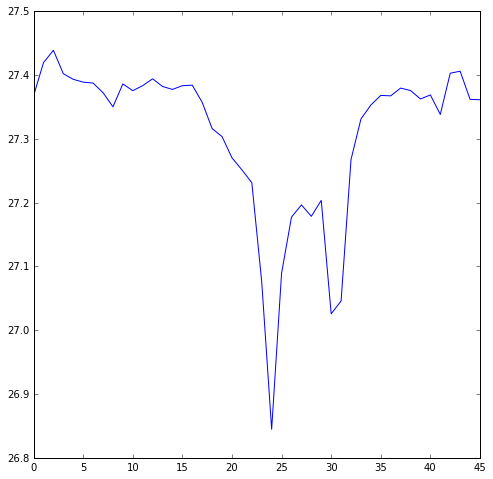

In [38]:
import pickle
import copy
tmaxData=pickle.load(open('../../Data/Weather/tmax_all_stations.pickle','r'))
decJanData = STAT['TMAX']['NE'][-31:].tolist()+STAT['TMAX']['NE'][:15].tolist()
uniqueStations = len(tmaxData)
countPerStation = numpy.array(decJanData)/uniqueStations
figure(figsize=(8,8))
plot(countPerStation,'-')

ChristmasData = copy.copy(tmaxData)
for i in range(0,len(tmaxData)):
    ChristmasData[i]= (ChristmasData[i][0],ChristmasData[i][1][-6:-5].tolist())

stationsdecrease = []
for i in range(0,len(tmaxData)):
    overallavg = sum(tmaxData[i][1])/365
    avgChristmasData = sum(ChristmasData[i][1])/1
    if overallavg > avgChristmasData:
        stationsdecrease.append(tmaxData[i][0])
        
print "Number of overall stations are ", len(tmaxData)
print "Number of stations whose average dropped on Dec 24 near christmas are " , len(stationsdecrease)

NewYearData = copy.copy(tmaxData)
for i in range(0,len(tmaxData)):
    NewYearData[i]= (NewYearData[i][0],NewYearData[i][1][-1:0].tolist())

stationsdecrease = []
for i in range(0,len(tmaxData)):
    overallavg = sum(tmaxData[i][1])/365
    avgNewYearData = sum(NewYearData[i][1])/1
    if overallavg > avgNewYearData:
        stationsdecrease.append(tmaxData[i][0])
        
print "Number of stations whose average dropped on Dec 31 near new year are " , len(stationsdecrease)



* The reason for lower counts for SNWD seems to be mainly due to gradual decrease in temperature throughout year. As can be seen from yearly graph there are more readings during summers than winter. Now as per my analysis this pattern follows for almost all stations. So, as the temperature decreases throughout year, there seems to be gradual decrease in the number of counts for all stations due to high cold. So, there is no way we can remove this effect. 

* I have done this analysis for november and december snow data. According to my analysis there are around 25% stations whose daily count average has dropped in november and december period respectively. And none of them seems to have more prominent issue than others. I have also plotted below the counts for stations throughout november and december, and as it can be seen the decrease is gradual due to may be increase in snow depth and not due to mainly holidays.

Number of overall stations are  34933
Number of stations whose average dropped in November December are  8466


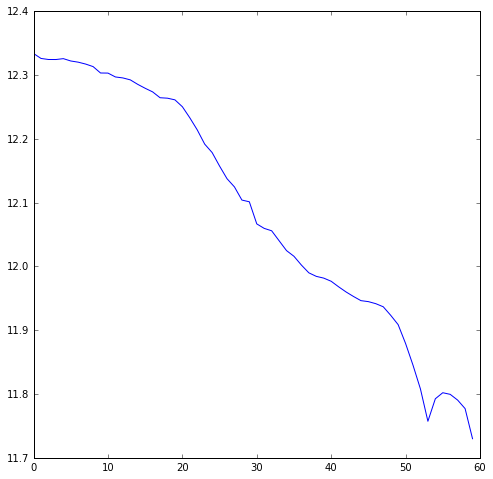

In [54]:
import pickle
import copy
snwdData=pickle.load(open('../../Data/Weather/snwd_all_stations.pickle','r'))
novDecData = STAT['SNWD']['NE'][-60:].tolist()
uniqueStations = len(snwdData)
countPerStation = numpy.array(novDecData)/uniqueStations
figure(figsize=(8,8))
plot(countPerStation,'-')

novDecData = STAT['SNWD']['NE'][-30:].tolist()

NovDecData = copy.copy(snwdData)
for i in range(0,len(snwdData)):
    NovDecData[i]= (NovDecData[i][0],NovDecData[i][1][-30:].tolist())

stationsdecrease = []
for i in range(0,len(snwdData)):
    overallavg = sum(snwdData[i][1])/365
    avgNovDecData = sum(NovDecData[i][1])/30
    if overallavg > avgNovDecData:
        stationsdecrease.append(snwdData[i][0])
        
print "Number of overall stations are ", len(snwdData)
print "Number of stations whose average dropped in November December are " , len(stationsdecrease)

### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

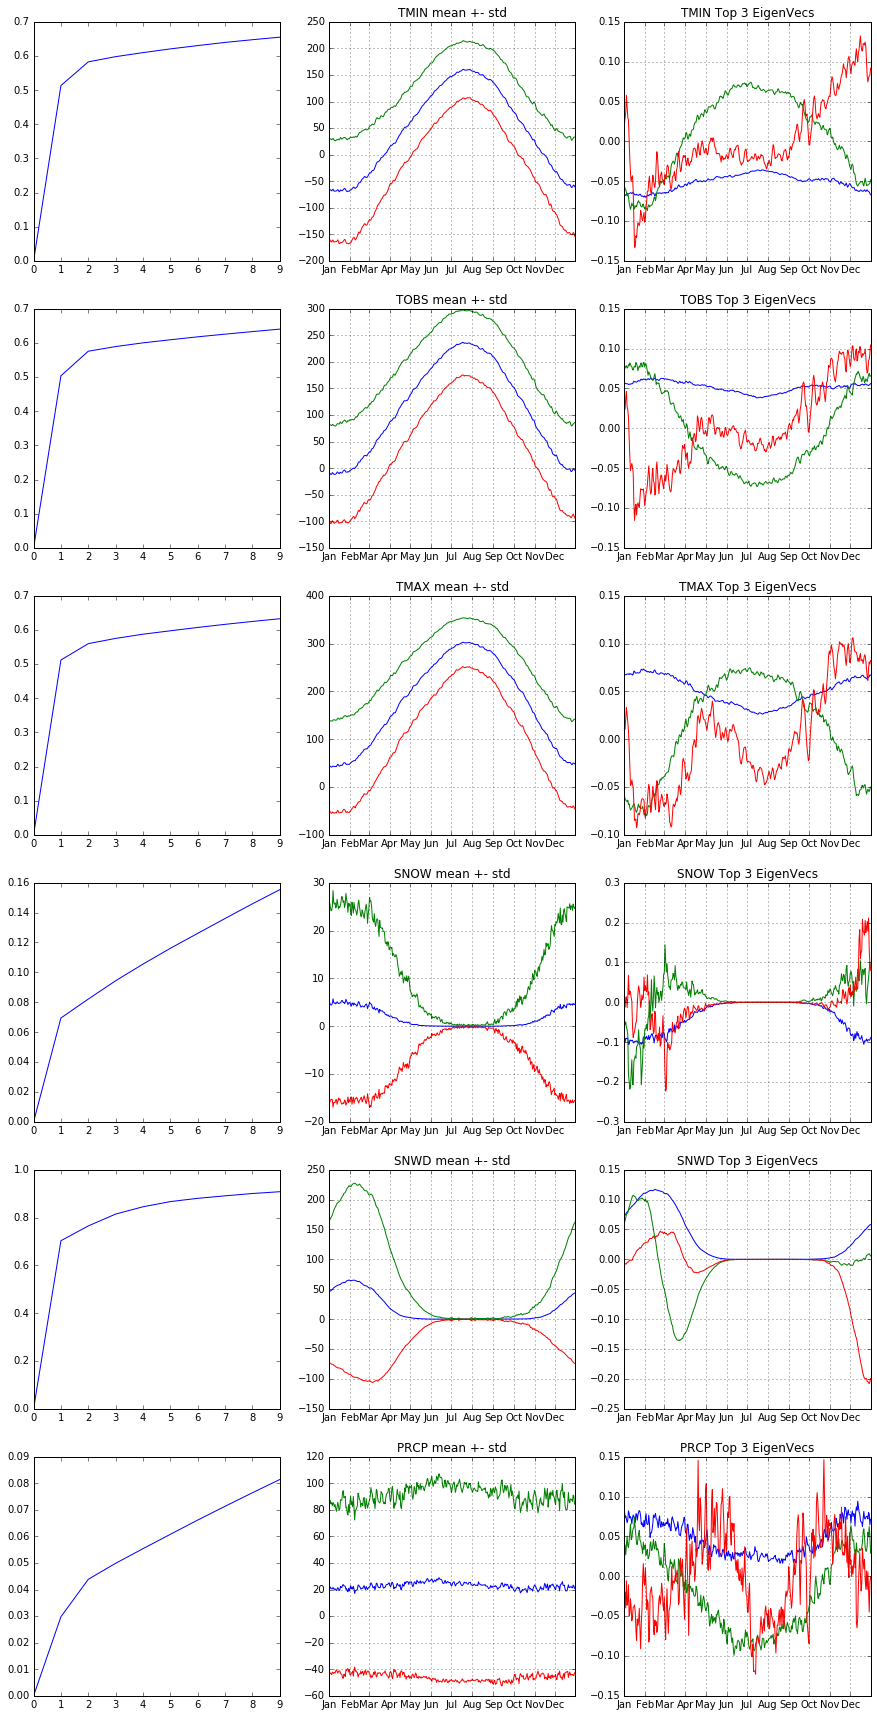

In [13]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for percentage of variance explained
    varE= [(sum(STAT[meas]['eigval'][:i])*1.0/sum(STAT[meas]['eigval'])) for i in range(0,10)]
    plot(varE)
    subplot(6,3,offset)
    offset+=1
    YearlyPlots(STAT[meas]['Mean'],meas+' mean +- std')
    YearlyPlots(STAT[meas]['Mean']+numpy.sqrt(STAT[meas]['Var']),meas+' mean +- std')
    YearlyPlots(STAT[meas]['Mean']-numpy.sqrt(STAT[meas]['Var']),meas+' mean +- std')
    ## Your code for mean and mean +- std
    subplot(6,3,offset)
    offset+=1
    YearlyPlots(STAT[meas]['eigvec'].T[0], meas+' Top 3 EigenVecs')
    YearlyPlots(STAT[meas]['eigvec'].T[1], meas+' Top 3 EigenVecs')
    YearlyPlots(STAT[meas]['eigvec'].T[2], meas+' Top 3 EigenVecs')
    ## Your code for top-3 eigenvectors